In [1]:
import sys
import os
import json
import pandas as pd
import numpy as np
import random
import copy
from collections import Counter, defaultdict

# Visualization packages
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Append system path
sys.path = [p for p in sys.path if not p.endswith('../..')]  # Cleans duplicated '../..'
sys.path.insert(0, '../')  # This adds `src` to the path

from helpers import io, filters, constants
from analysis import analysis_util as util
from analysis import visualization_util as viz_util


%load_ext autoreload
%autoreload 2

# Data Loading

In [2]:
data_summary_json = io.read_data_summary_json("../../data_summaries/")
all_constants = io.read_all_constants("../../constants/")
data_summary = filters.map_license_criteria(data_summary_json, all_constants)
print(len(data_summary_json))

3690


# Test Data

Tests your data summary rows to see if all the values are in the constants. If not, it will print out the missing values, and which data collections they came from.

In [3]:
util.check_datasummary_in_constants(data_summary, all_constants)

There is metadata missing from the constants/ files for License Classes:
Please check if you can modify the name of the entity (in data summary) to exactly match the entity as written in the constants files -- so we don't have multiple versions.
If it is not in the constants file in any form, then add it to the constants file.

https://shannon.cs.illinois.edu/DenotationGraph/#:~:text=Downloads   |   Appears in: {'Dynosaur'}
https://simple.wikiquote.org/wiki/Wikiquote:Copyrights   |   Appears in: {'Dynosaur'}
https://huggingface.co/datasets/codeparrot/github-code   |   Appears in: {'Dynosaur'}
https://cims.nyu.edu/~sbowman/multinli/paper.pdf   |   Appears in: {'Dynosaur'}
https://www.govinfo.gov/about   |   Appears in: {'Dynosaur'}
https://catalog.ldc.upenn.edu/LDC2003T05   |   Appears in: {'Dynosaur'}
https://github.com/ShuyangCao/open-ended_question_ontology   |   Appears in: {'Dynosaur'}
https://www.microsoft.com/en-us/legal/intellectualproperty/copyright   |   Appears in: {'Dynosaur

# Extract & Categorize Data

Runs through all rows of the data summary, and applies the constants files to categorize the licenses, creators, tasks, sources, languages, and other metadata, so it is ready for plotting.

In [4]:
all_info = util.extract_info(data_summary, all_constants)
commercial_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["commercial"]}
unspecified_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["unspecified"]}
ncao_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["non-commercial", "academic-only"]}

print(f"Total Rows = {len(all_info)}")
print(f"Total Rows w/ Commercially permissible licenses (according to DPI) = {len(commercial_info)}")
print(f"Total Rows w/ Unspecified licenses (according to DPI) = {len(unspecified_info)}")
print(f"Total Rows w/ Non-Commercial/Academic-Only licenses (according to DPI) = {len(ncao_info)}")

Total Rows = 3690
Total Rows w/ Commercially permissible licenses (according to DPI) = 2019
Total Rows w/ Unspecified licenses (according to DPI) = 638
Total Rows w/ Non-Commercial/Academic-Only licenses (according to DPI) = 1033


# Plot License Breakdowns, by different Categories

In [5]:
viz_util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["LANGUAGE_GROUPS"],
    "Language Groups",
    name_remapper=None,
    exclude_groups={},
    savename="langs_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Afroasiatic': [15, 3, 43], 'Atlantic-Congo': [6, 2, 36], 'Hindustani': [12, 4, 17], 'Sino-Tibetan': [32, 14, 33], 'Austronesian': [13, 3, 47], 'English': [809, 623, 1559], 'Japonic': [6, 1, 15], 'Turkic': [14, 1, 18], 'Uralic': [2, 1, 16], 'Koreanic': [6, 0, 10], 'Other': [22, 0, 62], 'Code': [24, 47, 248], 'Dravidian': [5, 1, 16], 'Kra-Dai': [20, 5, 28], 'Indo-European': [99, 25, 197]})


alt.LayerChart(...)

In [6]:
task_name_remapper = {
    "Short Text Generation": "Short Text Gen",
    "Bias & Toxicity Detection": "Bias/Toxic Detect",
    "Bias & Toxicicity Detection": "Bias/Toxic Detect",
    "Natural Language Inference": "NLI",
    "Commonsense Reasoning": "Commonsense Reas.",
    "Logical and Mathematical Reasoning": "Logic & Math",
}
viz_util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["TASK_GROUPS"],
    "Task Groups",
    name_remapper=task_name_remapper,
    exclude_groups={},
    savename="tasks_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Text Classification': [222, 207, 313], 'Open-form Text Generation': [131, 24, 143], 'Sequence Tagging': [28, 6, 26], 'Dialog Generation': [68, 59, 92], 'Chain-of-Thought': [17, 3, 87], 'Question Answering': [368, 201, 677], 'Commonsense Reas.': [52, 15, 43], 'Short Text Gen': [101, 52, 236], 'Token Classification': [0, 0, 0], 'Code': [124, 55, 364], 'Response Ranking': [29, 18, 7], 'Language Style Analysis': [36, 18, 43], 'Summarization': [137, 27, 159], 'Translation': [123, 22, 334], 'Logic & Math': [183, 24, 249], 'Brainstorming': [30, 1, 33], 'Vision Based Tasks': [0, 0, 0], 'Miscellaneous': [18, 17, 124], 'Creative Writing': [51, 15, 35], 'NLI': [131, 164, 259], 'Explanation': [51, 3, 19], 'Bias/Toxic Detect': [18, 25, 62], 'Creativity': [32, 5, 15]})


alt.LayerChart(...)

In [7]:
excludes = ["Other", "Others", "Unsure", "Template Gen", "Human","Reviews", "Unknown", "ML Datasets", "Conversations", "Search Queries"]
viz_util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["DOMAIN_GROUPS"],
    "Domains",
    name_remapper=None,
    exclude_groups=excludes,
    savename="sources_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Books': [133, 22, 96], 'Entertainment': [116, 56, 63], 'Academic Papers': [121, 13, 33], 'Biomedical': [39, 16, 15], 'General Web': [171, 46, 74], 'News': [282, 55, 148], 'Governments': [108, 25, 37], 'Commerce': [14, 15, 19], 'Exams': [50, 20, 42], 'Models': [115, 2, 7], 'Template Generated': [76, 38, 16], 'Legal': [109, 8, 11], 'Encyclopedias': [306, 98, 594], 'Code': [387, 66, 480], 'Social Media': [99, 104, 77], 'Education': [15, 1, 41]})


alt.LayerChart(...)

In [8]:
viz_util.plot_grouped_time_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    "Preparation Times",
    disallow_repeat_dsetnames=True,
    savename="times_stacked-altair.json"
)

defaultdict(<class 'list'>, {'< 2013': [9, 44, 11], '2013': [0, 3, 5], '2014': [2, 3, 0], '2015': [5, 47, 1], '2016': [2, 18, 14], '2017': [10, 15, 7], '2018': [14, 35, 28], '2019': [30, 84, 42], '2020': [88, 111, 83], '2021': [368, 86, 529], '2022': [139, 63, 403], '2023': [149, 35, 184], '2024': [9, 0, 81]})


alt.LayerChart(...)

Fraction of Total Licenses Requiring Attribution = 89.31%
Fraction of Total Licenses Requiring Share Alike = 35.68%


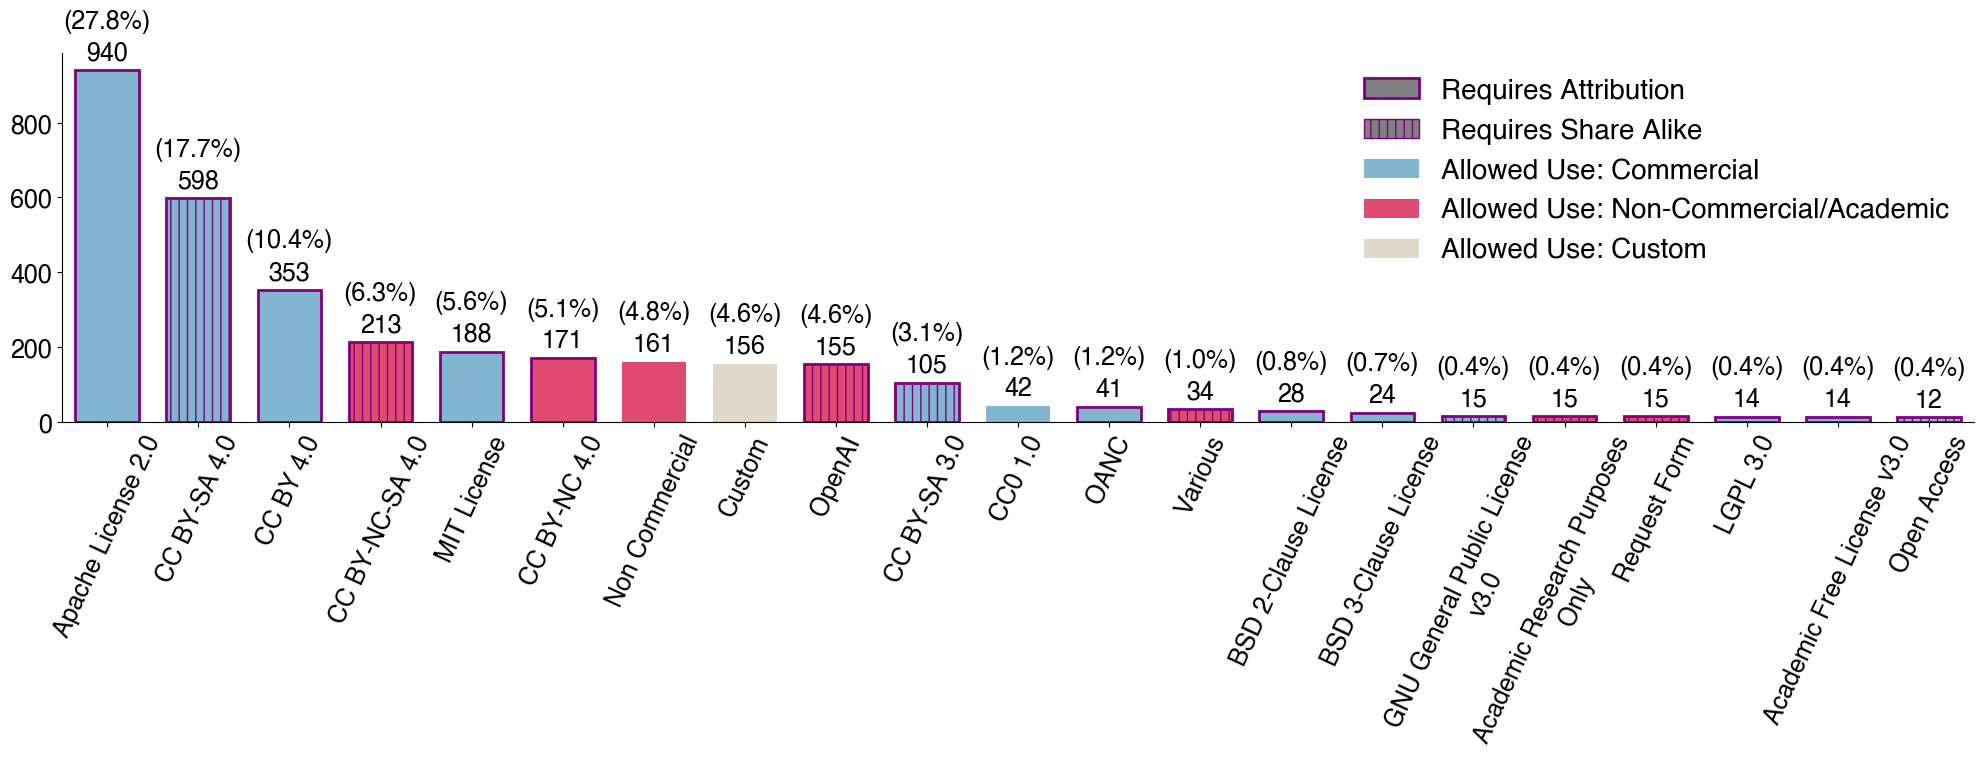

In [9]:
viz_util.plot_license_breakdown(
    all_info, 
    all_constants["LICENSE_CLASSES"],
    disallow_repeat_dsetnames=True,
    savename="license_dist.pdf"
)

In [11]:
# ncao_info